# Lab 6.1 Data Transformation.

## 0. We need to upgrade pandas to the newest version

In [1]:
!pip3 install --upgrade pandas

Requirement already up-to-date: pandas in /Users/mohsenmosleh/anaconda3/envs/py37/lib/python3.7/site-packages (1.1.5)
You should consider upgrading via the '/Users/mohsenmosleh/anaconda3/envs/py37/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install xlrd

# 1. Let's load some libraries

In [2]:
import pandas as pd

In [3]:
pd.__version__

'0.23.4'

In [52]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

# 2. Let's load and concatenate some datasets

In [6]:
# similar to reading data from csv file, we can read data from excel sheets, we need to specify which column we need to read data from
# this data is a sample from comercial software Tableau
order_df=pd.read_excel('Superstore.xls')
order_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,variable,value
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Sales,261.9600
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Sales,731.9400
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Sales,14.6200
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Sales,957.5775
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Sales,22.3680


In [7]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39976 entries, 0 to 39975
Data columns (total 19 columns):
Row ID           39976 non-null int64
Order ID         39976 non-null object
Order Date       39976 non-null datetime64[ns]
Ship Date        39976 non-null datetime64[ns]
Ship Mode        39976 non-null object
Customer ID      39976 non-null object
Customer Name    39976 non-null object
Segment          39976 non-null object
Country          39976 non-null object
City             39976 non-null object
State            39976 non-null object
Postal Code      39976 non-null int64
Region           39976 non-null object
Product ID       39976 non-null object
Category         39976 non-null object
Sub-Category     39976 non-null object
Product Name     39976 non-null object
variable         39976 non-null object
value            39976 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(2), object(14)
memory usage: 6.1+ MB


In [8]:
order_df.shape

(39976, 19)

### Too many columns, lets select a few!

In [9]:
selected_columns=['Order ID', 'Order Date', 'Product ID','Ship Mode','Segment', 'Country', 'State', 'Region','Category',
'Sub-Category','variable','value']

order_df_selected=order_df[selected_columns]
# or similarly you can do
order_df_selected2=pd.DataFrame(order_df,columns=selected_columns)


In [10]:
order_df_selected.head()

,Order ID,Order Date,Product ID,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,variable,value
0,CA-2013-152156,2013-11-09,FUR-BO-10001798,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,Sales,261.9600
1,CA-2013-152156,2013-11-09,FUR-CH-10000454,Second Class,Consumer,United States,Kentucky,South,Furniture,Chairs,Sales,731.9400
2,CA-2013-138688,2013-06-13,OFF-LA-10000240,Second Class,Corporate,United States,California,West,Office Supplies,Labels,Sales,14.6200
3,US-2012-108966,2012-10-11,FUR-TA-10000577,Standard Class,Consumer,United States,Florida,South,Furniture,Tables,Sales,957.5775
4,US-2012-108966,2012-10-11,OFF-ST-10000760,Standard Class,Consumer,United States,Florida,South,Office Supplies,Storage,Sales,22.3680


In [11]:
order_df_selected2.head()

,Order ID,Order Date,Product ID,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,variable,value
0,CA-2013-152156,2013-11-09,FUR-BO-10001798,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,Sales,261.9600
1,CA-2013-152156,2013-11-09,FUR-CH-10000454,Second Class,Consumer,United States,Kentucky,South,Furniture,Chairs,Sales,731.9400
2,CA-2013-138688,2013-06-13,OFF-LA-10000240,Second Class,Corporate,United States,California,West,Office Supplies,Labels,Sales,14.6200
3,US-2012-108966,2012-10-11,FUR-TA-10000577,Standard Class,Consumer,United States,Florida,South,Furniture,Tables,Sales,957.5775
4,US-2012-108966,2012-10-11,OFF-ST-10000760,Standard Class,Consumer,United States,Florida,South,Office Supplies,Storage,Sales,22.3680


### Task 1. Your manager wants a report in form of a table where on rows you have different Regions, on columns you have different Segments, and you show the average sales for the combination of Regions and Segments

### Like the following table


<img src="https://www.dropbox.com/s/bnatmk1j00xi1yh/Screen%20Shot%202021-02-24%20at%2011.27.30%20AM.png?dl=1">


In [14]:
# approach 1:

order_df_selected_pivoted=order_df_selected.pivot_table(index=['Order ID','Order Date','Product ID','Ship Mode','Segment','Country','State','Region','Category','Sub-Category']
                        ,columns='variable', values='value')



order_df_selected_pivoted.reset_index(inplace=True)
order_df_selected_pivoted.head()

variable,Order ID,Order Date,Product ID,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Discount,Profit,Quantity,Sales
0,CA-2011-100006,2011-09-07,TEC-PH-10002075,Standard Class,Consumer,United States,New York,East,Technology,Phones,0.0,109.6113,3.0,377.970
1,CA-2011-100090,2011-07-08,FUR-TA-10003715,Standard Class,Corporate,United States,California,West,Furniture,Tables,0.2,-87.9354,3.0,502.488
2,CA-2011-100090,2011-07-08,OFF-BI-10001597,Standard Class,Corporate,United States,California,West,Office Supplies,Binders,0.2,68.8464,6.0,196.704
3,CA-2011-100293,2011-03-14,OFF-PA-10000176,Standard Class,Home Office,United States,Florida,South,Office Supplies,Paper,0.2,31.8696,6.0,91.056
4,CA-2011-100328,2011-01-29,OFF-BI-10000343,Standard Class,Consumer,United States,New York,East,Office Supplies,Binders,0.2,1.3257,1.0,3.928


In [15]:
order_df_selected_pivoted_agg=order_df_selected_pivoted.groupby(['Region','Segment'])[['Sales']].mean()
order_df_selected_pivoted_agg.reset_index(inplace=True)
order_df_selected_pivoted_agg.head()

variable,Region,Segment,Sales
0,Central,Consumer,207.946728
1,Central,Corporate,234.763466
2,Central,Home Office,208.248046
3,East,Consumer,238.875539
4,East,Corporate,227.534917


In [16]:
order_df_selected_pivoted_agg.pivot_table(index='Region',columns='Segment',values='Sales')

Segment,Consumer,Corporate,Home Office
Region,,,
Central,207.946728,234.763466,208.248046
East,238.875539,227.534917,254.291028
South,233.155796,238.992025,273.640723
West,217.110251,235.265911,239.442692


### Challenge yourself: Think about other approaches to create the same outcome:

### Task 2. Provide the minimum, maximum, and average for Discount, Profit, Quanitity, and sales for combinations of Regions and Segments

<img src="https://www.dropbox.com/s/mu9bsdya0e6yqhp/Screen%20Shot%202021-02-24%20at%208.21.17%20PM.png?dl=1">



In [18]:
order_df_selected_pivoted.groupby(['Region','Segment']).agg(
    {'Discount':['min','max','mean'],
     'Profit':['min','max','mean'],
     'Quantity':['min','max','mean'],
     'Sales':['min','max','mean'],
    }
                                                        )

Discount                    Profit                        \
                         min  max      mean        min        max       mean   
Region  Segment                                                                
Central Consumer         0.0  0.8  0.252030 -3701.8928  4946.3700   7.066046   
        Corporate        0.0  0.8  0.239822 -2929.4845  8399.9760  27.791831   
        Home Office      0.0  0.8  0.208858 -1143.8910  1906.4850  28.398202   
East    Consumer         0.0  0.7  0.147447 -6599.9780  5039.9856  28.040153   
        Corporate        0.0  0.7  0.144521  -950.4000  2365.9818  26.605980   
        Home Office      0.0  0.7  0.141000  -760.9800  3919.9888  53.407922   
South   Consumer         0.0  0.7  0.142294 -1862.3124  3177.4750  32.005971   
        Corporate        0.0  0.7  0.157745 -3839.9904  1459.2000  29.833771   
        Home Office      0.0  0.7  0.144238 -1811.0784   746.4078  16.427909   
West    Consumer         0.0  0.7  0.107451  -786.7440  6719.9808  34.373604   
        Corporate        0.0  0.7  0.113958  -465.5680  1906.4850  35.872323   
        Home Office      0.0  0.7  0.106918 -3399.9800  1644.2913  28.949939   

                    Quantity                  Sales                         
                         min   max      mean    min        max        mean  
Region  Segment                                                             
Central Consumer         1.0  14.0  3.728548  0.444   9892.740  207.946728  
        Corporate        1.0  11.0  3.869242  0.556  17499.950  234.763466  
        Home Office      1.0  14.0  3.783105  1.408   3812.970  208.248046  
East    Consumer         1.0  14.0  3.639891  0.852  10499.970  238.875539  
        Corporate        1.0  14.0  3.826484  1.188   9099.930  227.534917  
        Home Office      1.0  14.0  3.816000  1.640  11199.968  254.291028  
South   Consumer         1.0  14.0  3.791517  1.344   8749.950  233.155796  
        Corporate        1.0  14.0  3.952941  1.167   7999.980  238.992025  
        Home Office      1.0  14.0  3.693309  2.816  22638.480  273.640723  
West    Consumer         1.0  14.0  3.871933  1.080  13999.960  217.110251  
        Corporate        1.0  14.0  3.781250  1.188   5083.960  235.265911  
        Home Office      1.0  14.0  3.781086  0.990   4535.976  239.442692

In [ ]:
### Task 3. Your managers needs a graph for variation of Sales and Profit over different months

In [25]:
order_df_selected_pivoted['date_formated']=pd.to_datetime(order_df_selected_pivoted['Order Date'])

In [43]:
order_df_selected_pivoted_agg_year=order_df_selected_pivoted.groupby(['Segment','Region','State',pd.Grouper(key='date_formated',freq='m')]).mean()
order_df_selected_pivoted_agg_year.reset_index(inplace=True)

In [44]:
order_df_selected_pivoted_agg_year_melt=order_df_selected_pivoted_agg_year.melt(id_vars=['date_formated','Segment','Region','State'],value_vars=['Discount','Profit','Quantity','Sales'])

In [48]:
order_df_selected_pivoted_agg_year_melt.head()

,date_formated,Segment,Region,State,variable,value
0,2011-02-28,Consumer,Central,Illinois,Discount,0.600000
1,2011-03-31,Consumer,Central,Illinois,Discount,0.500000
2,2011-05-31,Consumer,Central,Illinois,Discount,0.485714
3,2011-06-30,Consumer,Central,Illinois,Discount,0.362500
4,2011-07-31,Consumer,Central,Illinois,Discount,0.200000


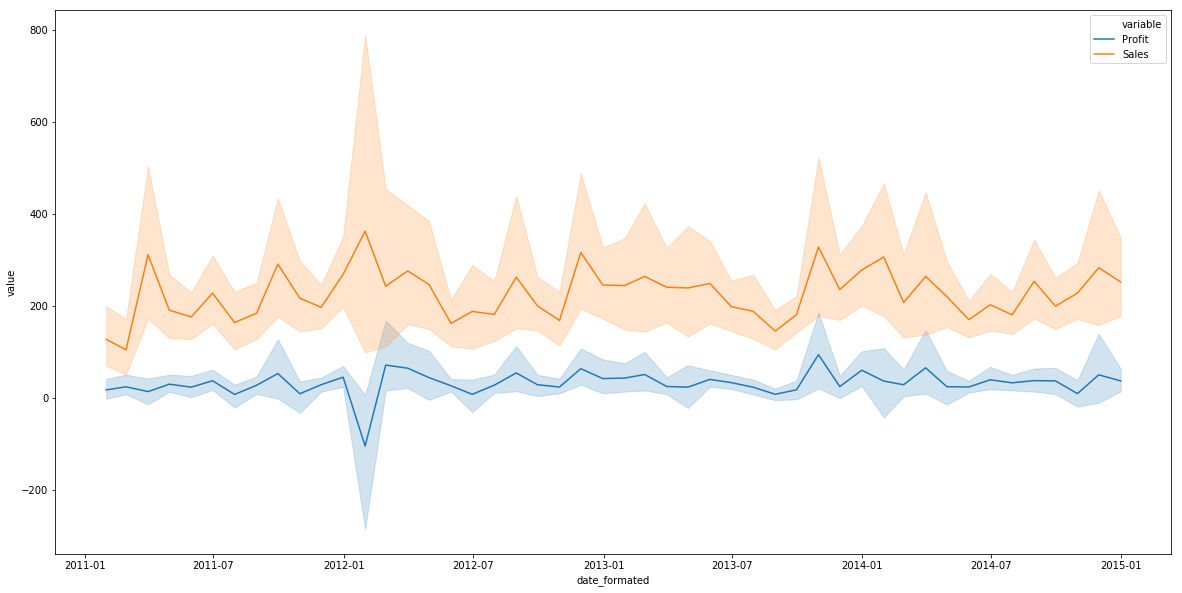

In [55]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = order_df_selected_pivoted_agg_year_melt[(order_df_selected_pivoted_agg_year_melt['variable']=='Sales')|
                                                           (order_df_selected_pivoted_agg_year_melt['variable']=='Profit')],
             ax=ax,
             x="date_formated", 
             y="value", 
             hue='variable')

<img src="https://www.dropbox.com/s/6viz7d65ijaoi3d/Screen%20Shot%202021-02-24%20at%209.02.01%20PM.png?dl=1">


